In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [95]:
df=pd.read_csv(r"C:\Users\fayaz\Downloads\pizza_sales.csv")

In [96]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [97]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [98]:
df.shape

(48620, 12)

In [99]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id            str
quantity               int64
order_date               str
order_time               str
unit_price           float64
total_price          float64
pizza_size               str
pizza_category           str
pizza_ingredients        str
pizza_name               str
dtype: object

In [100]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [101]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [102]:
df=df.drop_duplicates()

kpi

In [103]:
total_revenue=df['total_price'].sum()
total_pizzaSold=df['quantity'].sum()
total_orders=df['order_id'].nunique()
avg_orders_value= total_revenue/total_orders
avg_pizza_per_order= total_pizzaSold/total_orders


print("total revenue : $",total_revenue)
print("total  pizza Sold : ",total_pizzaSold)
print("total orders : ",total_orders)
print("avg orders value : $",avg_orders_value)
print("avg pizza per order: ",avg_pizza_per_order)



total revenue : $ 817860.0499999999
total  pizza Sold :  49574
total orders :  21350
avg orders value : $ 38.30726229508196
avg pizza per order:  2.321967213114754


CHARTS

In [104]:
Ingrediant=(df['pizza_ingredients']
            .str.split(',')
            .explode()
            .str.strip()
            .value_counts()
            .reset_index()
            .rename(columns={'index':'count','pizza_ingredients':'indegredients'}))
print(Ingrediant.head(8))

       indegredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624


top 8 indegredients

In [105]:
print(df['order_date'])

0        01-01-2015
1        01-01-2015
2        01-01-2015
3        01-01-2015
4        01-01-2015
            ...    
48615    31-12-2015
48616    31-12-2015
48617    31-12-2015
48618    31-12-2015
48619    31-12-2015
Name: order_date, Length: 48620, dtype: str


In [106]:
df['order_date']=pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name']=df['order_date'].dt.day_name()
print(df['day_name'])

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
48615    Thursday
48616    Thursday
48617    Thursday
48618    Thursday
48619    Thursday
Name: day_name, Length: 48620, dtype: str


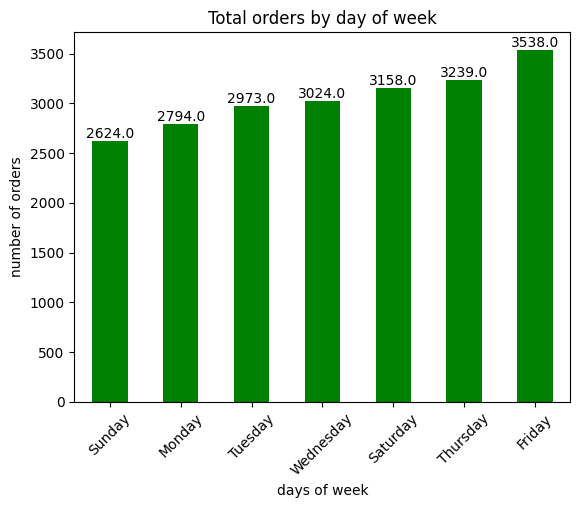

In [107]:
orders_by_day=df.groupby('day_name',observed=False)['order_id'].nunique().sort_values()
plt.Figure(figsize=(8,5))
orders_by_day.plot(kind= 'bar',color='green')
plt.title('Total orders by day of week')
plt.xlabel("days of week")
plt.ylabel('number of orders')
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0],fmt='%.1f')
plt.show()

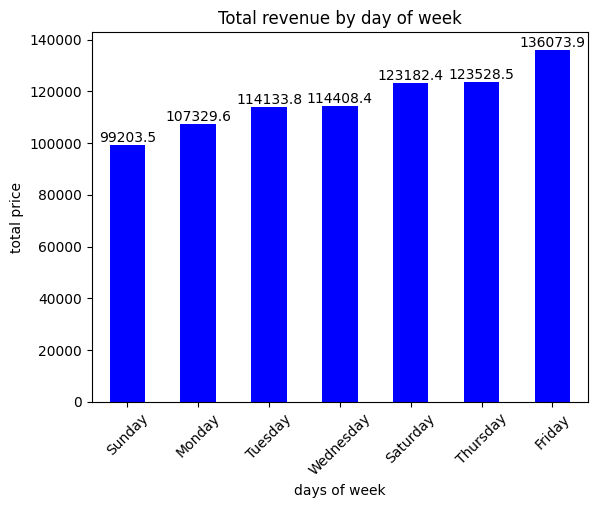

In [108]:
orders_by_day=df.groupby('day_name',observed=False)['total_price'].sum().sort_values()
plt.Figure(figsize=(8,5))
orders_by_day.plot(kind= 'bar',color='blue')
plt.title('Total revenue by day of week')
plt.xlabel("days of week")
plt.ylabel('total price')
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0],fmt='%.1f')
plt.show()

In [109]:
df['order_time']=pd.to_datetime(df['order_time'],format='%H:%M:%S')
df['order_hour']=df['order_time'].dt.hour
print(df['order_hour'])

0        11
1        11
2        11
3        11
4        11
         ..
48615    21
48616    21
48617    21
48618    22
48619    23
Name: order_hour, Length: 48620, dtype: int32


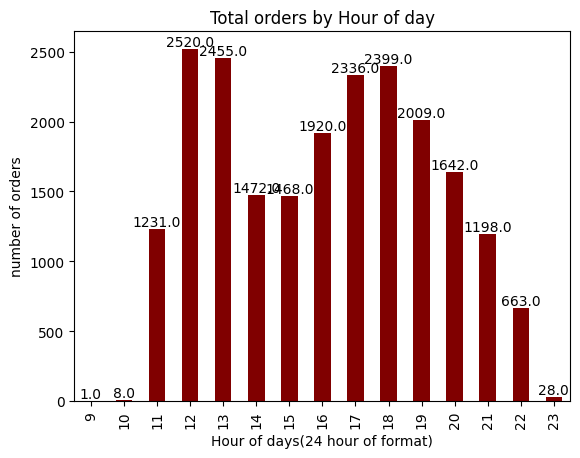

In [110]:
orders_by_day=df.groupby('order_hour',observed=False)['order_id'].nunique()
plt.Figure(figsize=(10,5))
orders_by_day.plot(kind= 'bar',color='maroon')
plt.title('Total orders by Hour of day')
plt.xlabel("Hour of days(24 hour of format)")
plt.ylabel('number of orders')
plt.bar_label(plt.gca().containers[0],fmt='%.1f')
plt.show()

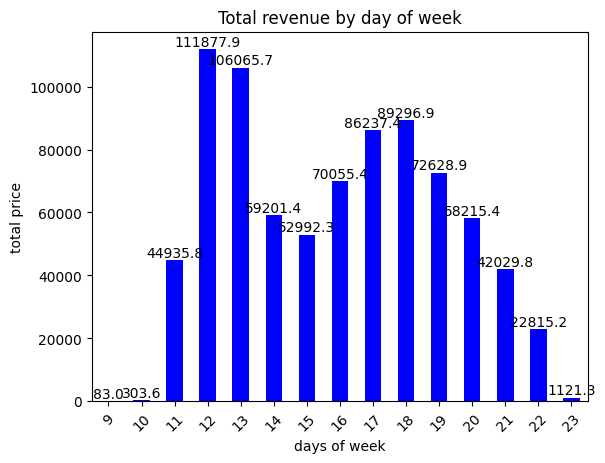

In [111]:
orders_by_day=df.groupby('order_hour',observed=False)['total_price'].sum()
plt.Figure(figsize=(8,5))
orders_by_day.plot(kind= 'bar',color='blue')
plt.title('Total revenue by day of week')
plt.xlabel("days of week")
plt.ylabel('total price')
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0],fmt='%.1f')
plt.show()

In [112]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True,format='%y-%m-%d')
df['month_name']=df['order_date'].dt.month_name()
print(df['month_name'])

0         January
1         January
2         January
3         January
4         January
           ...   
48615    December
48616    December
48617    December
48618    December
48619    December
Name: month_name, Length: 48620, dtype: str


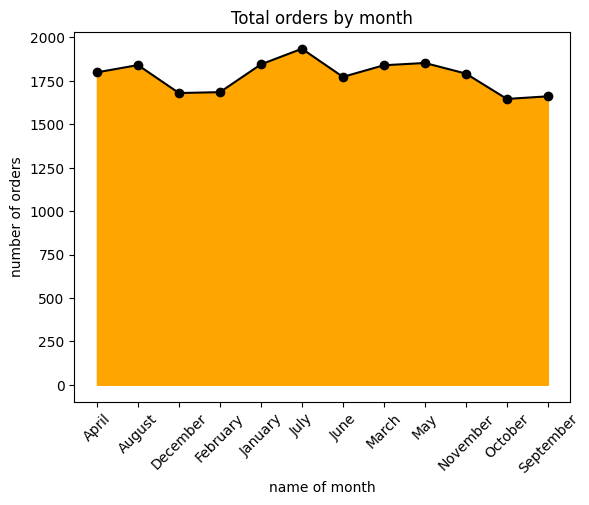

In [113]:
orders_by_month=df.groupby('month_name',observed=False)['order_id'].nunique()
plt.Figure(figsize=(10,5))
plt.fill_between(orders_by_month.index,orders_by_month.values,color="orange")
plt.plot(orders_by_month.index, orders_by_month.values, color="black",marker='o')
plt.title('Total orders by month')
plt.xlabel("name of month")
plt.ylabel('number of orders')
plt.xticks(rotation=45)
plt.show()

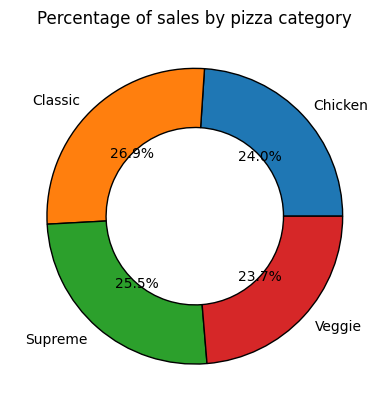

In [114]:
from turtle import width
from unicodedata import category


category_sales=df.groupby('pizza_category')['total_price'].sum()
category_pct=category_sales/category_sales.sum()*100
plt.Figure(figsize=(7,7))
plt.pie(category_pct,labels=category_pct.index, autopct='%1.1f%%',wedgeprops={'edgecolor':'black', 'width':0.4})
plt.title('Percentage of sales by pizza category')
plt.show()

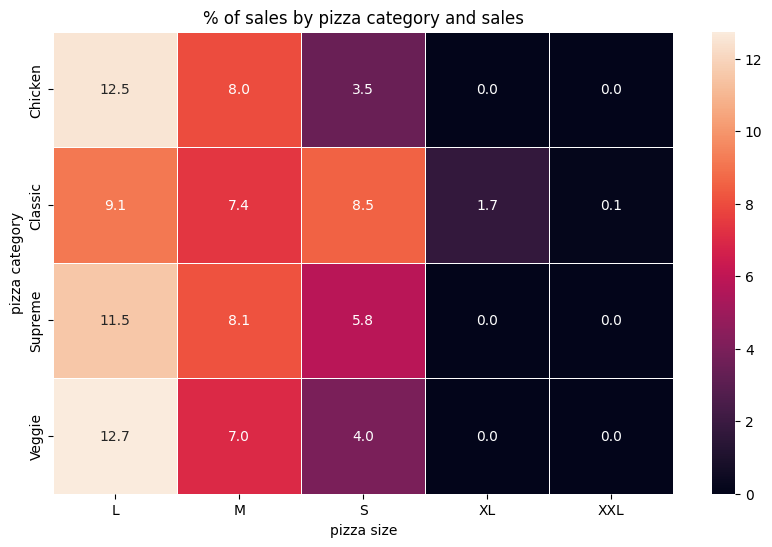

In [115]:
sales_pivot=df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)
sales_pct=sales_pivot/sales_pivot.sum().sum()*100

plt.figure(figsize=(10,6))
sb.heatmap(sales_pct,annot=True,fmt=".1f",linewidths=0.5)
plt.title("% of sales by pizza category and sales")
plt.xlabel("pizza size")
plt.ylabel("pizza category")
plt.show()

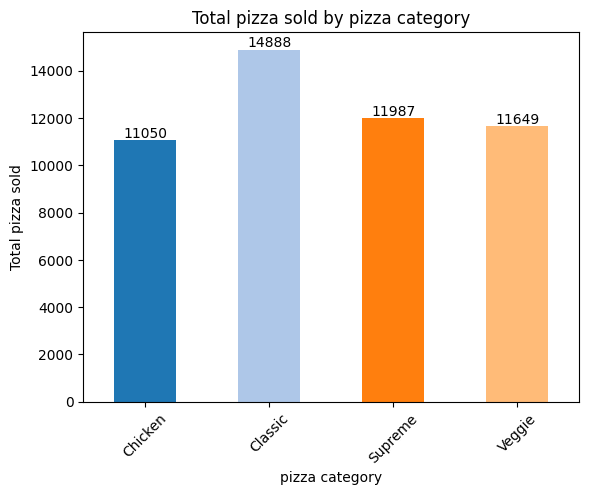

In [116]:
from turtle import width
from unicodedata import category


pizza_by_category=df.groupby('pizza_category')['quantity'].sum()
colors=list(plt.get_cmap('tab20').colors)
colors=colors[:len(pizza_by_category)]
plt.Figure(figsize=(7,7))
pizza_by_category.plot(kind= 'bar',color=colors)
plt.title('Total pizza sold by pizza category')
plt.xlabel("pizza category")
plt.ylabel("Total pizza sold")
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])
plt.show()

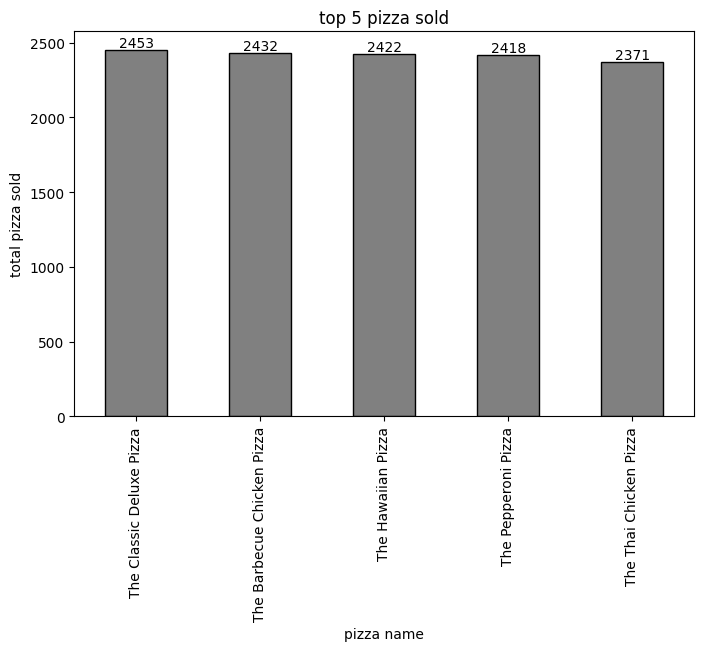

In [117]:
pizza_by_name=df.groupby('pizza_name')['quantity'].sum()
tops=pizza_by_name.sort_values(ascending=False).head(5)
tops.plot(kind='bar',figsize=(8,5),color='grey',edgecolor='black')
plt.title("top 5 pizza sold")
plt.xlabel("pizza name")
plt.ylabel("total pizza sold")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()

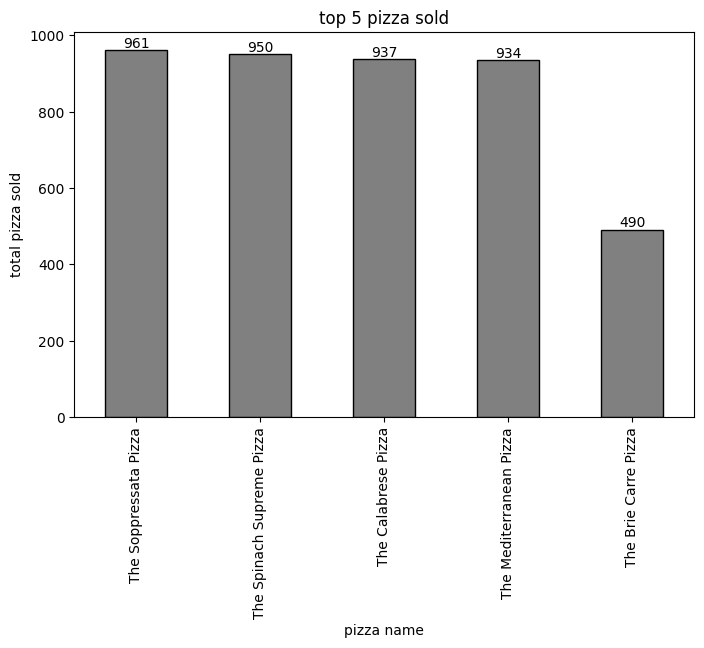

In [118]:
pizza_by_name=df.groupby('pizza_name')['quantity'].sum()
bottom=pizza_by_name.sort_values(ascending=False).tail(5)
bottom.plot(kind='bar',figsize=(8,5),color='grey',edgecolor='black')
plt.title("top 5 pizza sold")
plt.xlabel("pizza name")
plt.ylabel("total pizza sold")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()

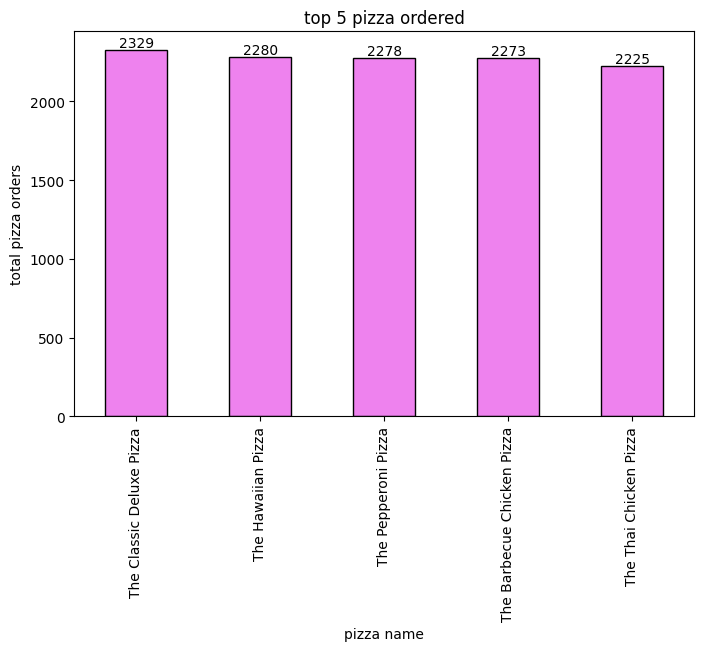

In [119]:
pizza_by_name=df.groupby('pizza_name')['order_id'].nunique()
tops=pizza_by_name.sort_values(ascending=False).head(5)
tops.plot(kind='bar',figsize=(8,5),color='violet',edgecolor='black')
plt.title("top 5 pizza ordered")
plt.xlabel("pizza name")
plt.ylabel("total pizza orders")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()

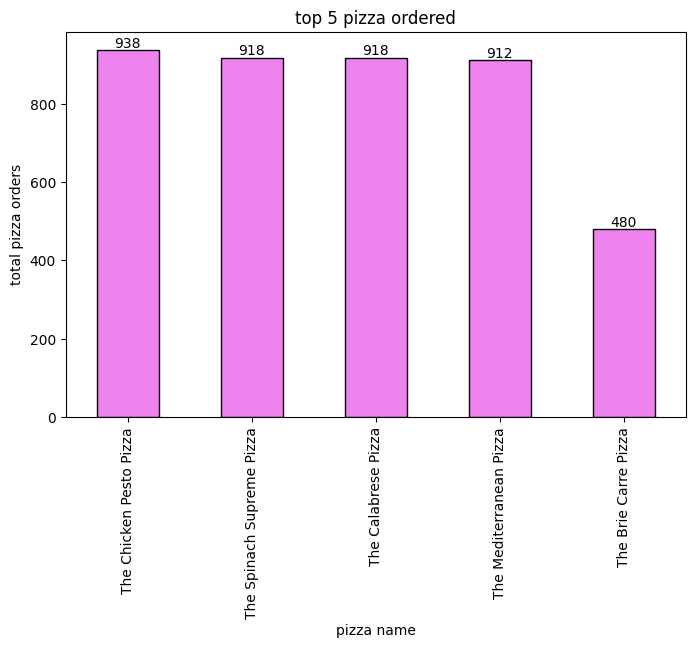

In [120]:
pizza_by_name=df.groupby('pizza_name')['order_id'].nunique()
bottom=pizza_by_name.sort_values(ascending=False).tail(5)
bottom.plot(kind='bar',figsize=(8,5),color='violet',edgecolor='black')
plt.title("top 5 pizza ordered")
plt.xlabel("pizza name")
plt.ylabel("total pizza orders")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()

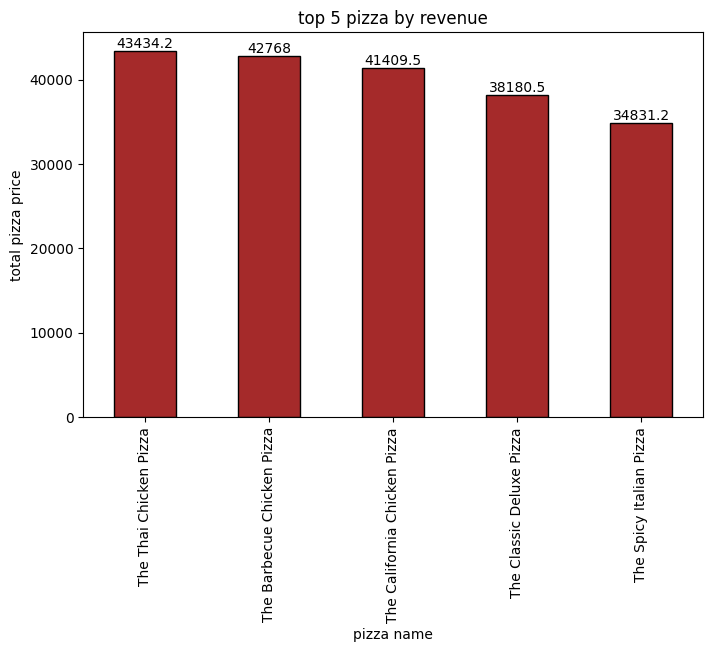

In [121]:
pizza_by_name=df.groupby('pizza_name')['total_price'].sum()
tops=pizza_by_name.sort_values(ascending=False).head(5)
tops.plot(kind='bar',figsize=(8,5),color='brown',edgecolor='black')
plt.title("top 5 pizza by revenue")
plt.xlabel("pizza name")
plt.ylabel("total pizza price")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()

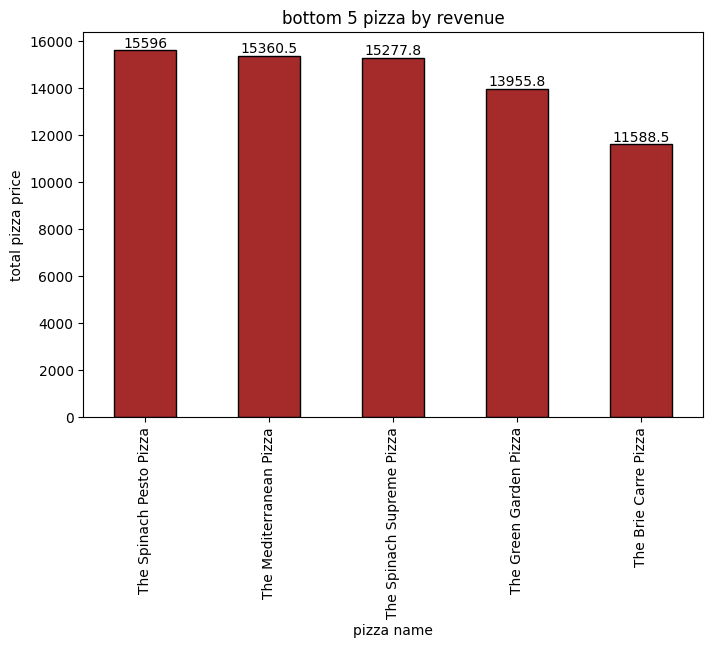

In [122]:
pizza_by_name=df.groupby('pizza_name')['total_price'].sum()
bottom=pizza_by_name.sort_values(ascending=False).tail(5)
bottom.plot(kind='bar',figsize=(8,5),color='brown',edgecolor='black')
plt.title("bottom 5 pizza by revenue")
plt.xlabel("pizza name")
plt.ylabel("total pizza price")
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])
plt.show()